In [14]:
import tensorflow as tf
from tensorflow import keras
import random
import copy
import matplotlib.pyplot as plt
import time
from threading import Thread
import os
from IPython.core.display import HTML
from base64 import b64encode
%matplotlib inline

# generate data

In [2]:
class Cell:
    def __init__(self, x, y, dead=False):
        self.x = x
        self.y = y
        self.isDead = dead
        
    def key(self):
        return f"{self.x},{self.y}"
    
    def scan(self, cells):
        self.alive = {}
        self.dead = {}
        
        # scan 8 surrounding cells
        for y_offset in range(-1, 2):
            for x_offset in range(-1, 2):
                if not (x_offset == 0 and y_offset == 0):
                    x = self.x + x_offset
                    y = self.y + y_offset
                    key = f"{x},{y}"
                    # find the neighbor
                    if key in cells:
                        self.alive[key] = cells[key]
                    # create a dead cell
                    else:
                        dead_cell = Cell(x, y, True)
                        self.dead[key] = dead_cell
                        
    
    # assumes this cell has already been scanned
    # returns alive cell if new state alive else nothing
    def tick(self):
        # Any live cell with two or three live neighbours survives
        if not self.isDead:
            alive_count = len(self.alive)
            if alive_count == 2 or alive_count == 3:
                return self
        
        # Any dead cell with three live neighbours becomes a live cell
        else:
            if len(self.alive) == 3:
                self.isDead = False
                return self
        
        # All other live cells die in the next generation
        # Similarly, all other dead cells stay dead
        return None

In [3]:
class GameOfLife:
    def __init__(self, count, width, height):
        # generate cells
        self.width = width
        self.height = height
        self.cells = {}
        self.id = ("%032x" % random.getrandbits(128))[0:6]
        
        while len(self.cells) < count:
            half_width, half_height = int(width/2), int(height/2)
            x = random.randint(-half_width, half_width)
            y = random.randint(-half_height, half_height)
            cell = Cell(x, y)
            self.cells[cell.key()] = cell
    
    def to_pixels(self, half_width, half_height):
        # convert cells to pixels
        pixels = []
        for y in range(-half_height, half_height):
            column = []
            for x in range(-half_width, half_width):
                color = 1 if f"{x},{y}" in self.cells else 0
                column.append(color)
            pixels.append(column)
        return pixels
    
    def update(self, width=None, height=None):
        self.tick()
        self.draw(width, height)
    
    def draw(self, width=None, height=None):
        width = width if width else self.width
        height = height if height else self.height
        half_width, half_height = int(width/2), int(height/2)
        
        data = self.to_pixels(half_width, half_height)
        plt.imshow(data, interpolation='nearest')
        
        # adjust graph view
        plt.xlim([-0.5, width-0.5])
        plt.xlim([-0.5, height-0.5])
        
    def tick(self):
        # create a new state
        new_cells = {}
        
        # consolidate dead cells
        dead_cells = {}
        for key, cell in self.cells.items():
            # update cell
            cell.scan(self.cells)
            
            # aggregate new dead cells
            for dead_key, dead_cell in cell.dead.items():
                if (not dead_key in dead_cells):
                    dead_cells[dead_key] = dead_cell
            
            # find next state
            next_cell = cell.tick()
            if next_cell:
                new_cells[key] = next_cell
        
        # tick dead cells
        for key, cell in dead_cells.items():
            # update cell
            cell.scan(self.cells)
            
            # find next state
            next_cell = cell.tick()
            if next_cell:
                new_cells[key] = next_cell
                
        # update scene
        self.cells = new_cells

In [4]:
# config
screen_size = 4
spawn_size = 100
frame = 0
sim = None

def sim_dir_name():
    global spawn_size, sim
    return f"output/{spawn_size}-{sim.id}"

def sim_file_name(file_name):
    return f"{sim_dir_name()}/{file_name}.png"

def new_game():
    global sim, frame, screen_size, spawn_size
    frame = 0
    min_fill, max_fill = 0.25, 0.75
    max_count = spawn_size*spawn_size
    count = random.randint(max_count*min_fill, max_count*max_fill)
    # start the game
    sim = GameOfLife(count, spawn_size, spawn_size)
    # create save destination
    os.mkdir(sim_dir_name())
    return sim

def save_fig(frame):
    path = sim_file_name(str(frame).zfill(3))
    plt.savefig(path)

def next_frame(alt_size = None):
    global frame, screen_size, sim
    size = alt_size if alt_size else screen_size
    save_fig(frame)
    sim.update(size, size)
    frame += 1

In [5]:
# start new game
sim = new_game()
print(f"Instance: {sim.id}")

Instance: 556816


3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10
11/10


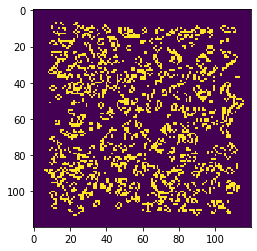

In [6]:
# practice run manually in batches
practice_runs = 10

next_milestone = 1
milestone_dist = 0.1
run_profit = milestone_dist * practice_runs
for i in range(1, practice_runs+1):
    if (i > next_milestone * run_profit):
        next_milestone += 1
        print(f"{i+1}/{practice_runs}")
    sim.tick()

sim.draw(spawn_size+20, spawn_size+20)

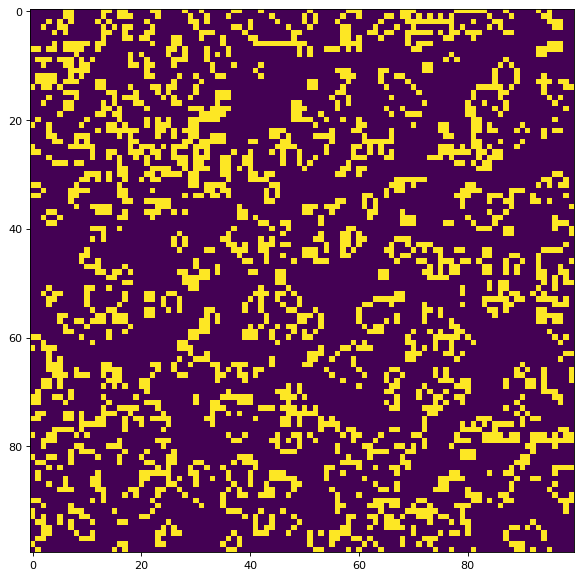

In [7]:
plt.figure(figsize=(12,9), dpi=80)

sim.draw(spawn_size, spawn_size)

# manually step through a simulation
next_frame(spawn_size)

Rendering: 4.00%
Rendering: 4.04%
Rendering: 4.08%
Rendering: 4.12%
Rendering: 4.16%
Rendering: 4.20%
Rendering: 4.25%
Rendering: 4.29%
Rendering: 4.33%
Rendering: 4.37%
Rendering: 4.42%
Rendering: 4.46%
Rendering: 4.51%
Rendering: 4.55%
Rendering: 4.60%
Rendering: 4.64%
Rendering: 4.69%
Rendering: 4.74%
Rendering: 4.78%
Rendering: 4.83%
Rendering: 4.88%
Rendering: 4.93%
Rendering: 4.98%
Rendering: 5.03%
Rendering: 5.08%
Rendering: 5.13%
Rendering: 5.18%
Rendering: 5.23%
Rendering: 5.29%
Rendering: 5.34%
Rendering: 5.39%
Rendering: 5.45%
Rendering: 5.50%
Rendering: 5.55%
Rendering: 5.61%
Rendering: 5.67%
Rendering: 5.72%
Rendering: 5.78%
Rendering: 5.84%
Rendering: 5.90%
Rendering: 5.96%
Rendering: 6.02%
Rendering: 6.08%
Rendering: 6.14%
Rendering: 6.20%
Rendering: 6.26%
Rendering: 6.32%
Rendering: 6.39%
Rendering: 6.45%
Rendering: 6.51%
Rendering: 6.58%
Rendering: 6.64%
Rendering: 6.71%
Rendering: 6.78%
Rendering: 6.85%
Rendering: 6.91%
Rendering: 6.98%
Rendering: 7.05%
Rendering: 7.1

KeyboardInterrupt: 

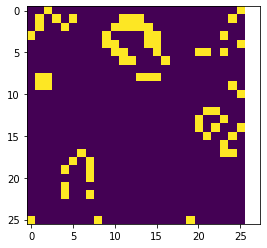

In [8]:
next_milestone = 1
milestone_dist = 0.001

# render frames
while screen_size < spawn_size:
    progress = screen_size/spawn_size
    if (progress > next_milestone * milestone_dist):
        next_milestone += 1
        progress_text = "{0:.2%}".format(progress)
        print(f"Rendering: {progress_text}")
    
    screen_size *= 1.01
    next_frame(screen_size)

In [ ]:
# convert images to video
file_pattern = sim_file_name("%03d")
video_file = f"{sim_dir_name()}.mp4"
os.system(f"ffmpeg -framerate 24 -i {file_pattern} -pix_fmt yuv420p {video_file}")
print(video_file)

In [17]:
# video playback
mp4 = open(video_file, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=100% controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")

# setup data